<a href="https://colab.research.google.com/github/tofighi/MachineLearning/blob/master/Detect_Traffic_Signs_with_Deep_Learning_DataCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Challenges in Traffic Sign Management**

Traffic signs convey vital information to drivers. However, their effectiveness can be hindered by various factors, such as their visibility under different lighting conditions or the presence of obstructions.


**Training Traffic Sign Detection Models**

To address these challenges and enhance stop sign and traffic light detection capabilities, advanced technologies such as deep learning and computer vision have gained significant attention. In this project, you'll train an object detection model on 6 images of stop signs and 6 images of traffic lights, taken from various angles and lighting conditions. This training teaches the model to classify and locate these signs in images, improving its robustness and reliability for real-world applications.

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

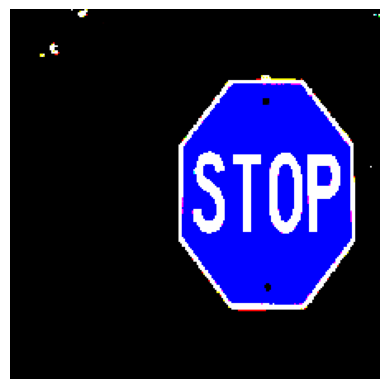

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import requests

# Load preprocessed images and the corresponding labels
url = 'https://github.com/tofighi/MachineLearning/raw/refs/heads/master/datasets/traffic_signs_data.npy'
response = requests.get(url)
with open('traffic_signs_data.npy', 'wb') as f:
    f.write(response.content)

image, labels = np.load('traffic_signs_data.npy', allow_pickle=True).tolist()

# hyperparameters
input_size = image.shape[1] # dimension of input image
num_classes = labels['classifier_head'].shape[1] # number of classes
DROPOUT_FACTOR = 0.2 # dropout probability

# visualize one example preprocessed image
plt.imshow(image[2])
plt.axis("off")

In [12]:
# Show the list of classes and some statistics
print("Classes in the dataset:")
# Assuming the order in labels['classifier_head'] corresponds to the class names
class_names = ['Stop Sign', 'Traffic Light'] # Based on the problem description and likely data structure
print(class_names)

print("\nTraining set statistics:")
num_samples = image.shape[0]
print(f"Number of samples: {num_samples}")

# Calculate and print the number of samples per class
# Assuming labels['classifier_head'] is one-hot encoded
class_counts = np.sum(labels['classifier_head'], axis=0)
for i, class_name in enumerate(class_names):
    print(f"Number of {class_name} samples: {int(class_counts[i])}")

Classes in the dataset:
['Stop Sign', 'Traffic Light']

Training set statistics:
Number of samples: 12
Number of Stop Sign samples: 6
Number of Traffic Light samples: 6


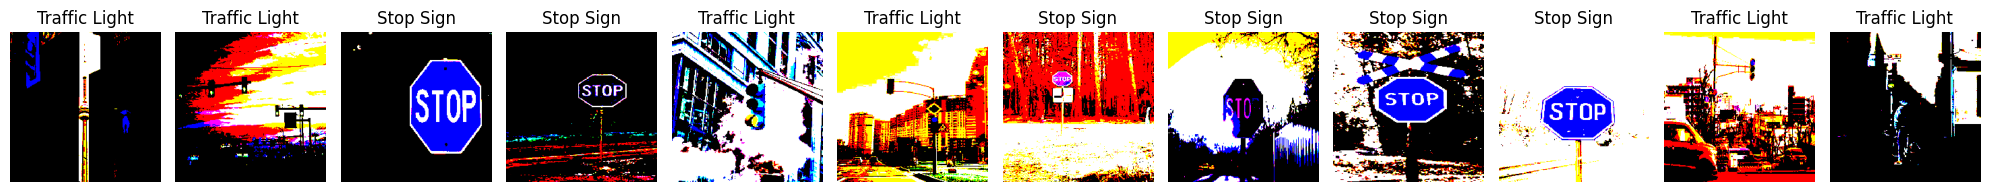

In [13]:
# Display all training samples in subfigures
num_images = image.shape[0]
fig, axes = plt.subplots(1, num_images, figsize=(20, 5)) # Adjust figsize as needed

for i in range(num_images):
    axes[i].imshow(image[i])
    axes[i].axis("off")
    # Optional: add title based on the class
    # Assuming labels['classifier_head'] is one-hot encoded
    class_index = np.argmax(labels['classifier_head'][i])
    class_name = class_names[class_index]
    axes[i].set_title(class_name)

plt.tight_layout()
plt.show()

In [3]:
# Feature Extractor
feature_extractor = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_size, input_size, 3)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(DROPOUT_FACTOR)])

# Model Adaptor
model_adaptor = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(64, activation='relu')])

# Classifier Head
classifier_head = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')])

# Full Model Definition
model = tf.keras.Sequential([
    feature_extractor,
    model_adaptor,
    classifier_head])

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 52, 52, 128)    │        93,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 64)             │    22,151,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 2)              │         4,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,770 (84.87 MB)

 Trainable params: 22,248,770 (84.87 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(image, labels['classifier_head'], epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5000 - loss: 5.7290
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 684.3682
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6667 - loss: 8.3084
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 11.2326
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5000 - loss: 45.5214
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8333 - loss: 9.0307
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.0077
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9167 - loss: 0.0762
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.0073
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 2.1346e-05
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 

In [6]:
# Extract training accuracy
accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {accuracy*100:.2f}%")

Training Accuracy: 100.00%


Saving download (1).jpeg to download (1).jpeg
User uploaded file "download (1).jpeg"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Detected: Traffic Light with confidence 0.50


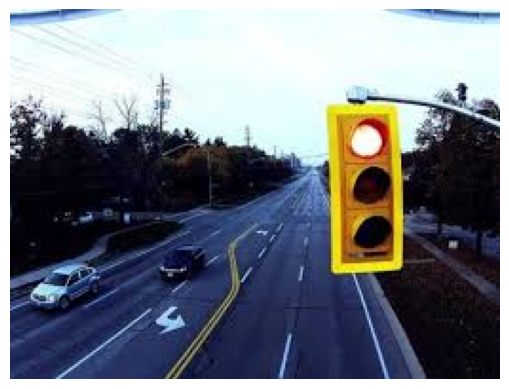

In [14]:
from google.colab import files
from PIL import Image
import numpy as np
import tensorflow as tf

def preprocess_image(image_path):
    """Preprocesses an image for model prediction."""
    img = Image.open(image_path).convert('RGB')
    img = img.resize((input_size, input_size))  # Resize to the input size of the model
    img_array = np.array(img, dtype=np.float32)
    img_array = (img_array - 127.5) / 127.5  # Normalize the image data as done during training
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_traffic_sign(image_path):
    """Predicts the traffic sign in an image."""
    preprocessed_img = preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)

    # Assuming the model outputs probabilities for each class (stop sign, traffic light)
    predicted_class_index = np.argmax(predictions)

    # You'll need to map the index back to the class name.
    # Based on the data loading, index 0 is likely 'stop sign' and index 1 is 'traffic light'.
    class_names = ['Stop Sign', 'Traffic Light']
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class, confidence

# Create a file upload form
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'User uploaded file "{filename}"')
    predicted_sign, confidence = predict_traffic_sign(filename)
    print(f"Detected: {predicted_sign} with confidence {confidence:.2f}")

    # Display the uploaded image (optional)
    img = Image.open(filename)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Saving 48fdc5_404fc415643045c3b9d490a4cf1988ef~mv2.avif to 48fdc5_404fc415643045c3b9d490a4cf1988ef~mv2 (1).avif
User uploaded file "48fdc5_404fc415643045c3b9d490a4cf1988ef~mv2 (1).avif"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Detected: Stop Sign with confidence 0.77


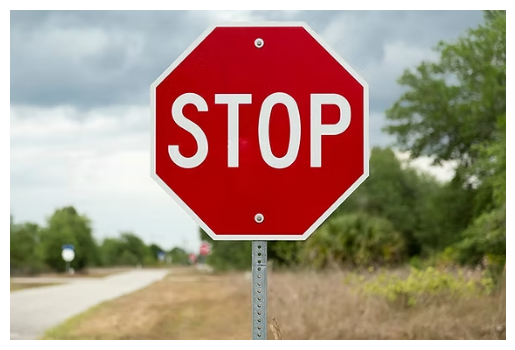

In [15]:
from google.colab import files
from PIL import Image
import numpy as np
import tensorflow as tf

def preprocess_image(image_path):
    """Preprocesses an image for model prediction."""
    img = Image.open(image_path).convert('RGB')
    img = img.resize((input_size, input_size))  # Resize to the input size of the model
    img_array = np.array(img, dtype=np.float32)
    img_array = (img_array - 127.5) / 127.5  # Normalize the image data as done during training
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_traffic_sign(image_path):
    """Predicts the traffic sign in an image."""
    preprocessed_img = preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)

    # Assuming the model outputs probabilities for each class (stop sign, traffic light)
    predicted_class_index = np.argmax(predictions)

    # You'll need to map the index back to the class name.
    # Based on the data loading, index 0 is likely 'stop sign' and index 1 is 'traffic light'.
    class_names = ['Stop Sign', 'Traffic Light']
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class, confidence

# Create a file upload form
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'User uploaded file "{filename}"')
    predicted_sign, confidence = predict_traffic_sign(filename)
    print(f"Detected: {predicted_sign} with confidence {confidence:.2f}")

    # Display the uploaded image (optional)
    img = Image.open(filename)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
